In [1]:
!pip install roboflow ultralytics

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="uFXIeXtRhpD4REMbT090")
project = rf.workspace("-jwzpw").project("continuous_fire")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.19, to fix: `pip install ultralytics==8.0.196`


In [3]:
import os
os.environ['WANDB_MODE'] = 'disabled'

In [4]:
!yolo task=detect mode=train model=yolov8n.pt data=/kaggle/working/continuous_fire-6/data.yaml epochs=25 imgsz=640 plots=True

Ultralytics YOLOv8.2.19 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/continuous_fire-6/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

In [6]:
import cv2
import matplotlib.pyplot as plt

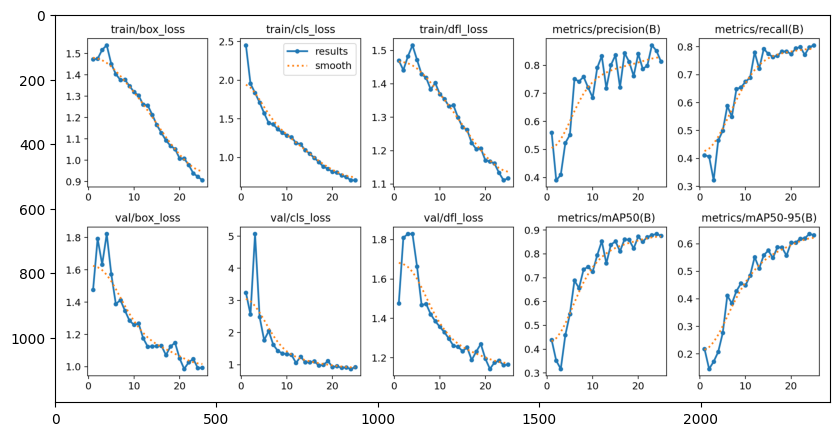

In [9]:
results = cv2.imread('/kaggle/working/runs/detect/train5/results.png')
results = cv2.cvtColor(results, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10)) 
plt.imshow(results)

In [10]:
# %load /kaggle/working/runs/detect/train5/results.csv
                  epoch,         train/box_loss,         train/cls_loss,         train/dfl_loss,   metrics/precision(B),      metrics/recall(B),       metrics/mAP50(B),    metrics/mAP50-95(B),           val/box_loss,           val/cls_loss,           val/dfl_loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 1.4731,                 2.4519,                 1.4697,                 0.5593,                0.41158,                0.43832,                0.21809,                 1.4758,                 3.2402,                 1.4766,             0.00065608,             0.00065608,             0.00065608
                      2,                 1.4751,                 1.9548,                 1.4409,                   0.39,                0.40737,                0.35178,                0.14562,                 1.7933,                 2.5621,                   1.81,              0.0012704,              0.0012704,              0.0012704
                      3,                 1.5174,                 1.8361,                 1.4822,                 0.4094,                0.32211,                0.31723,                0.17197,                 1.6335,                 5.0715,                 1.8288,              0.0018319,              0.0018319,              0.0018319
                      4,                 1.5386,                 1.7114,                 1.5155,                0.52286,                0.46421,                0.45924,                0.20744,                 1.8229,                 2.4862,                 1.8289,              0.0017624,              0.0017624,              0.0017624
                      5,                 1.4506,                 1.5734,                 1.4718,                0.55193,                 0.4992,                0.54774,                0.27646,                 1.5732,                 1.7618,                 1.6637,              0.0016832,              0.0016832,              0.0016832
                      6,                 1.4035,                  1.446,                 1.4288,                0.75123,                0.58807,                0.68795,                0.41193,                 1.3885,                 2.0501,                 1.4686,               0.001604,               0.001604,               0.001604
                      7,                 1.3756,                 1.4286,                 1.4182,                0.74235,                0.54947,                0.65632,                0.38323,                 1.4131,                 1.6194,                 1.4737,              0.0015248,              0.0015248,              0.0015248
                      8,                 1.3771,                 1.3658,                 1.3835,                0.75929,                0.64842,                0.73442,                0.42795,                 1.3473,                  1.428,                 1.4212,              0.0014456,              0.0014456,              0.0014456
                      9,                 1.3471,                 1.3205,                 1.4025,                0.72073,                0.65474,                0.74615,                0.45621,                 1.2853,                  1.352,                 1.3859,              0.0013664,              0.0013664,              0.0013664
                     10,                 1.3198,                 1.2829,                 1.3692,                0.68473,                0.67474,                0.72489,                 0.4488,                 1.2594,                 1.3236,                 1.3573,              0.0012872,              0.0012872,              0.0012872
                     11,                 1.3027,                 1.2645,                 1.3547,                0.79108,                0.68947,                0.79468,                 0.4844,                 1.2675,                 1.3047,                 1.3298,               0.001208,               0.001208,               0.001208
                     12,                 1.2605,                  1.188,                 1.3331,                0.83316,                   0.78,                0.85327,                0.55195,                 1.1763,                  1.054,                 1.2973,              0.0011288,              0.0011288,              0.0011288
                     13,                  1.257,                 1.1723,                 1.3356,                0.71791,                0.72105,                0.76022,                0.51012,                 1.1247,                 1.2503,                 1.2606,              0.0010496,              0.0010496,              0.0010496
                     14,                 1.2129,                  1.097,                 1.2991,                0.80083,                0.79263,                0.83836,                0.55856,                 1.1257,                 1.0802,                 1.2559,              0.0009704,              0.0009704,              0.0009704
                     15,                 1.1651,                 1.0488,                 1.2703,                0.83609,                0.77474,                0.85297,                 0.5757,                 1.1284,                 1.0736,                 1.2341,              0.0008912,              0.0008912,              0.0008912
                     16,                 1.1283,                0.99656,                 1.2621,                0.72101,                0.76316,                0.81073,                0.54847,                 1.1305,                 1.1036,                 1.2529,               0.000812,               0.000812,               0.000812
                     17,                 1.0929,                0.94078,                 1.2233,                0.84348,                0.76842,                 0.8614,                0.58724,                 1.0718,                0.97064,                  1.189,              0.0007328,              0.0007328,              0.0007328
                     18,                 1.0677,                0.88272,                 1.2046,                0.81279,                0.78316,                0.85895,                0.58638,                 1.1263,                0.99621,                 1.2316,              0.0006536,              0.0006536,              0.0006536
                     19,                 1.0525,                0.85456,                 1.2068,                0.76155,                0.78333,                0.82256,                0.55693,                 1.1483,                 1.1128,                 1.2703,              0.0005744,              0.0005744,              0.0005744
                     20,                 1.0088,                0.81413,                 1.1709,                0.84099,                0.77383,                0.87254,                0.60457,                 1.0515,                0.92697,                 1.1954,              0.0004952,              0.0004952,              0.0004952
                     21,                  1.008,                0.80641,                 1.1681,                0.78711,                0.79396,                0.85078,                0.60424,                0.98644,                0.95321,                 1.1437,               0.000416,               0.000416,               0.000416
                     22,                0.97797,                0.76881,                 1.1615,                0.79874,                0.79895,                0.87091,                0.61856,                  1.028,                0.90054,                  1.176,              0.0003368,              0.0003368,              0.0003368
                     23,                0.93887,                0.74838,                 1.1335,                0.87156,                0.77146,                0.87806,                0.61989,                 1.0484,                0.91148,                 1.1851,              0.0002576,              0.0002576,              0.0002576
                     24,                0.92298,                0.70749,                 1.1114,                0.85172,                0.79812,                0.88396,                0.63586,                0.99108,                 0.8675,                 1.1629,              0.0001784,              0.0001784,              0.0001784
                     25,                0.90636,                0.70659,                 1.1178,                  0.813,                0.80543,                0.87567,                0.63112,                0.99422,                0.91979,                 1.1654,               9.92e-05,               9.92e-05,               9.92e-05


In [24]:
import os
images_to_test = os.listdir('/kaggle/working/continuous_fire-6/test/images')[:20]
images_to_test

['HouseOne453_png.rf.63baf0682764422c6b4460de509ba49d.jpg',
 'Firefighterhelmetcaminteriorattack4195_png.rf.4e7bab26b95b5d5c1a8b59891f135862.jpg',
 'Img_25992_jpg.rf.cfbb1e223a9df2975348fe2c319ca7ce.jpg',
 'FlashoverDemonstration1587_png.rf.1217eef5c18bccb1d20666c7a374082c.jpg',
 'Img_6963_jpg.rf.e5e182b0fd10b25a4d124b756baea211.jpg',
 'CarOne356_png.rf.a9e9ddc325845e7f36d522db396c788c.jpg',
 'Img_7892_jpg.rf.276cfdc73cc00e7628bc5ccc2d0b8d2f.jpg',
 'Img_25876_jpg.rf.dbc91dacc98e0c17b23e719c6f7e5dda.jpg',
 'Img_6934_jpg.rf.2e47273eb77a29161a77e3a5cd83c1a7.jpg',
 'Img_25954_jpg.rf.bc7d8a247cc3e9915f14c5a436165f01.jpg',
 'FireDataOne9339_png.rf.f18970fdcbc2107b52ca3cbf7cde6ccc.jpg',
 'ClosingYourBedroomDoorCouldSaveYourLife-KDKA6340_png.rf.8bfa2f2e602074d9805260e72c628c18.jpg',
 'CarThree64_png.rf.f9a598c5c5b3bb34c71d41e0bc3f1a9e.jpg',
 'Img_26184_jpg.rf.f9070e192759298386a8d425232a2f4b.jpg',
 'CarOne59_png.rf.418ca3d0147111b35ce7f611ee091c2d.jpg',
 'Img_25916_jpg.rf.f3333a305a8c0035ce727

In [25]:
images = [f'/kaggle/working/continuous_fire-6/test/images/{img}' for img in images_to_test]
images

['/kaggle/working/continuous_fire-6/test/images/HouseOne453_png.rf.63baf0682764422c6b4460de509ba49d.jpg',
 '/kaggle/working/continuous_fire-6/test/images/Firefighterhelmetcaminteriorattack4195_png.rf.4e7bab26b95b5d5c1a8b59891f135862.jpg',
 '/kaggle/working/continuous_fire-6/test/images/Img_25992_jpg.rf.cfbb1e223a9df2975348fe2c319ca7ce.jpg',
 '/kaggle/working/continuous_fire-6/test/images/FlashoverDemonstration1587_png.rf.1217eef5c18bccb1d20666c7a374082c.jpg',
 '/kaggle/working/continuous_fire-6/test/images/Img_6963_jpg.rf.e5e182b0fd10b25a4d124b756baea211.jpg',
 '/kaggle/working/continuous_fire-6/test/images/CarOne356_png.rf.a9e9ddc325845e7f36d522db396c788c.jpg',
 '/kaggle/working/continuous_fire-6/test/images/Img_7892_jpg.rf.276cfdc73cc00e7628bc5ccc2d0b8d2f.jpg',
 '/kaggle/working/continuous_fire-6/test/images/Img_25876_jpg.rf.dbc91dacc98e0c17b23e719c6f7e5dda.jpg',
 '/kaggle/working/continuous_fire-6/test/images/Img_6934_jpg.rf.2e47273eb77a29161a77e3a5cd83c1a7.jpg',
 '/kaggle/working/c

In [32]:
from ultralytics import YOLO
from PIL import Image

model = YOLO("/kaggle/working/runs/detect/train5/weights/best.pt")

model.predict(images,save=True)


0: 640x640 1 fire, 4.6ms
1: 640x640 1 fire, 4.6ms
2: 640x640 2 fires, 4.6ms
3: 640x640 1 fire, 4.6ms
4: 640x640 1 fire, 4.6ms
5: 640x640 1 fire, 4.6ms
6: 640x640 1 fire, 4.6ms
7: 640x640 5 fires, 4.6ms
8: 640x640 1 fire, 4.6ms
9: 640x640 4 fires, 4.6ms
10: 640x640 1 fire, 4.6ms
11: 640x640 2 fires, 4.6ms
12: 640x640 1 fire, 4.6ms
13: 640x640 1 fire, 4.6ms
14: 640x640 3 fires, 4.6ms
15: 640x640 1 fire, 4.6ms
16: 640x640 2 fires, 4.6ms
17: 640x640 1 fire, 4.6ms
18: 640x640 (no detections), 4.6ms
19: 640x640 3 fires, 4.6ms
Speed: 3.2ms preprocess, 4.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict5


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fire'}
 obb: None
 orig_img: array([[[2, 0, 1],
         [2, 0, 1],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [2, 0, 0],
         [2, 0, 0]],
 
        [[2, 0, 1],
         [2, 0, 1],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [2, 0, 0],
         [2, 0, 0]],
 
        [[0, 0, 1],
         [0, 0, 1],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [2, 0, 0],
         [2, 0, 0]],
 
        ...,
 
        [[2, 0, 0],
         [2, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 1],
         [0, 0, 1],
         [0, 0, 1]],
 
        [[2, 0, 0],
         [2, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 3],
         [0, 0, 3],
         [0, 0, 3]],
 
        [[2, 0, 0],
         [2, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 3],
         [0, 0, 4],
     

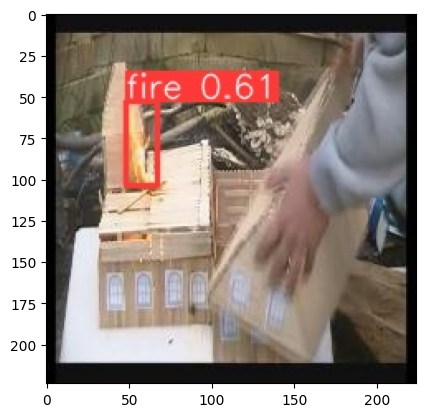

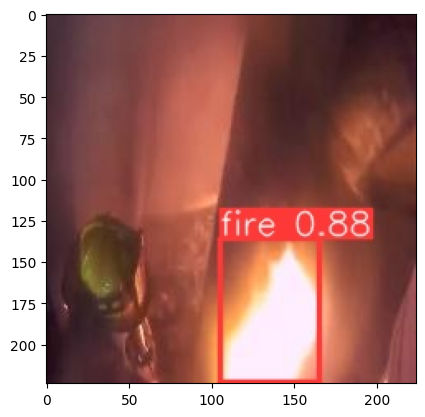

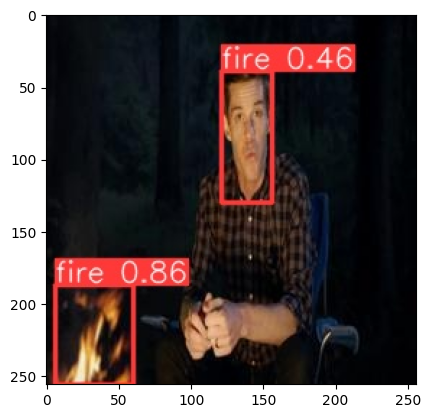

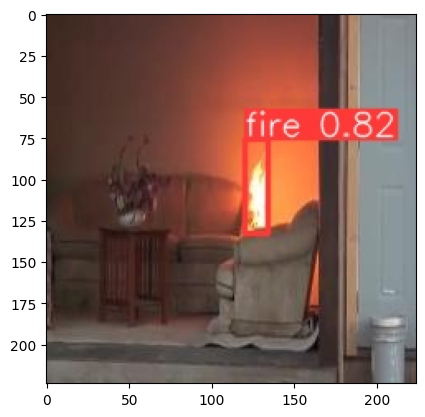

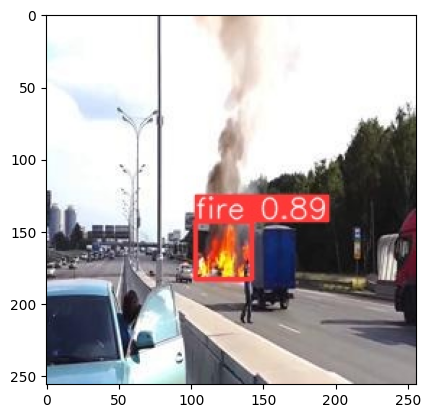

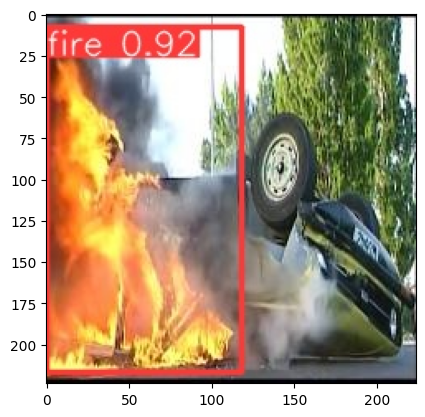

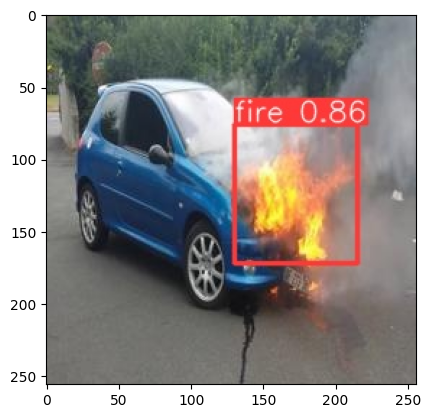

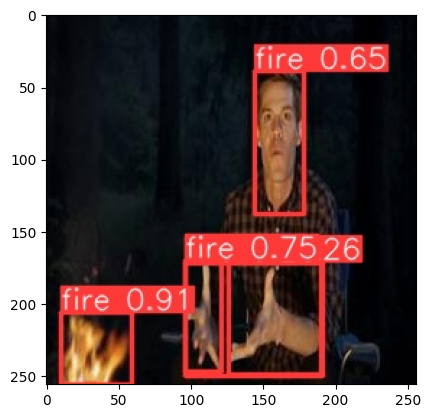

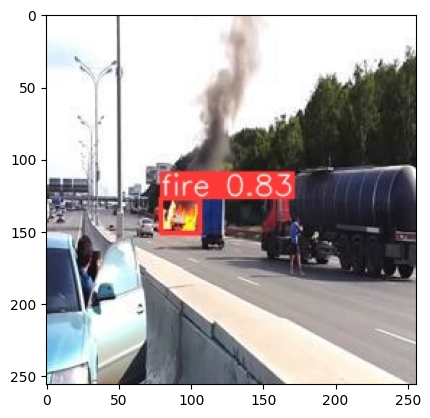

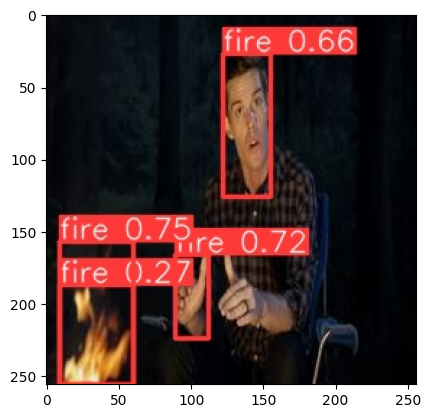

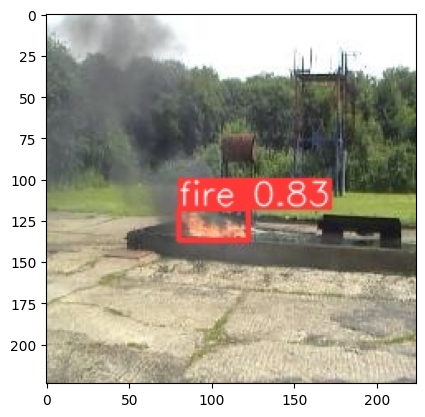

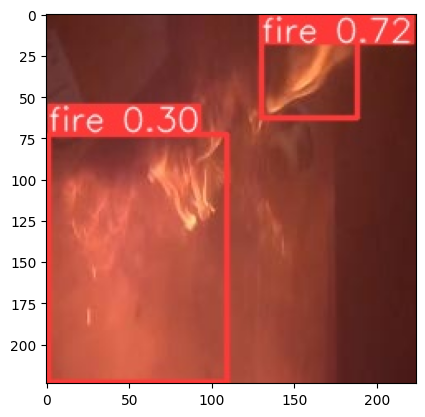

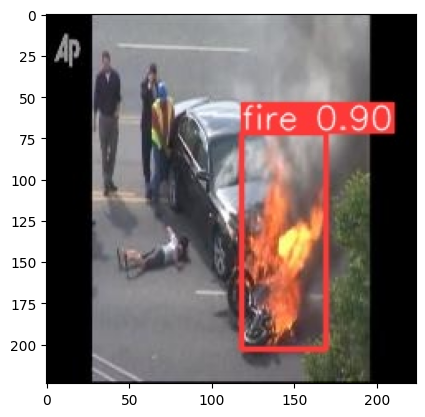

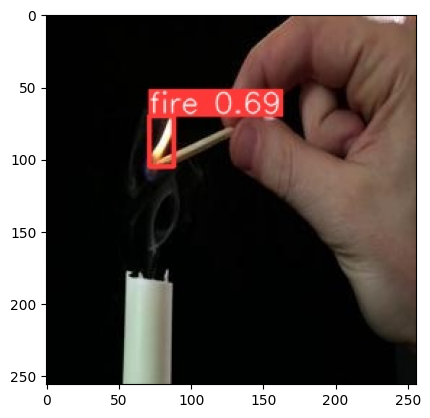

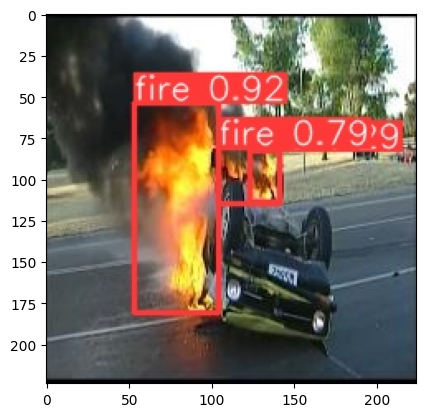

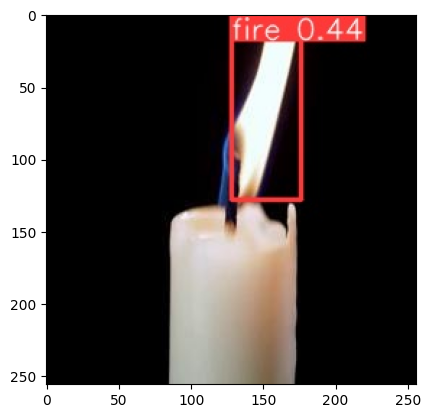

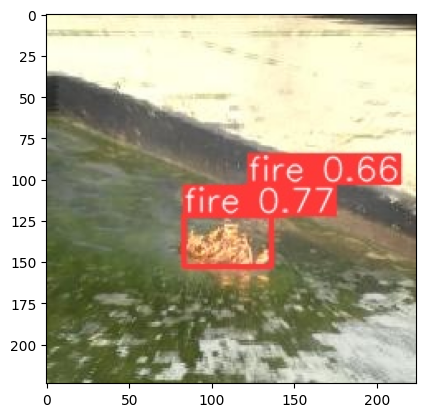

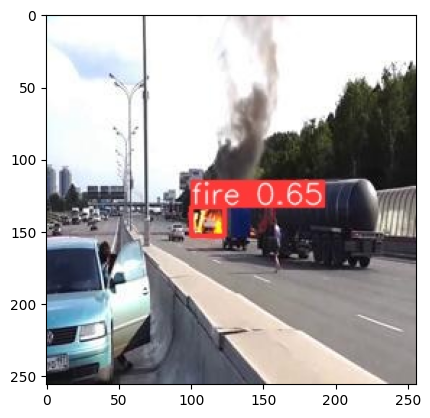

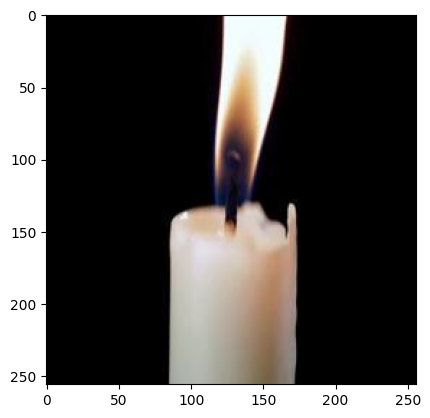

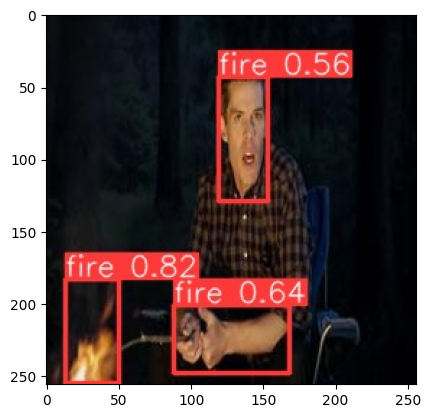

In [36]:
import cv2
import matplotlib.pyplot as plt

predictions = os.listdir('/kaggle/working/runs/detect/predict5')

for pred in predictions:
    img = cv2.imread(f'/kaggle/working/runs/detect/predict5/{pred}')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

In [37]:
#realtime

#model.predict(source=0,save=True,show=True)